In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# Parameters
Length = 100
Time = 25000
rho = 0.5
q = 8
dt = 1 / (rho * 100)

# Fixed points
u1 = 0
u2 = 1/2 * ( -1 + q + (np.sqrt(-4 * q  + rho * (1 + q)**2) / np.sqrt(rho))) # Largest fixed point 5.5615
u3 = 1/2 * ( -1 + q - (np.sqrt(-4 * q  + rho * (1 + q)**2) / np.sqrt(rho))) # 1.4384

# Initial conditions
x0 = 50
u0 = u3

In [84]:
def u(x): # This function is used to initialize the matrixSpaceTime
    global u0
    global x0
    return u0 / (1+np.exp(x - x0))


def term(matrix, t, x): # This function is used to calculate the time evolution of the matrix
    global rho
    global q

    # Boundary condition 0, if x == 0 then matrix[t-1,x-1] is out of bounds, thus = 0
    if x == 0:
        return rho * matrix[t-1,x] * (1 - matrix[t-1,x]/q) - matrix[t-1,x]/(1+matrix[t-1,x]) + (matrix[t-1,x+1]-2*matrix[t-1,x])
    
    # Boundary condition L, if x == Length-1 then matrix[t-1,x+1] is out of bounds, thus = 0
    if x == Length-1:
        return rho * matrix[t-1,x] * (1 - matrix[t-1,x]/q) - matrix[t-1,x]/(1+matrix[t-1,x]) + (matrix[t-1,x-1]-2*matrix[t-1,x])
    
    # General case, no boundary condition, all x's are in bounds
    return rho * matrix[t-1,x] * (1 - matrix[t-1,x]/q) - matrix[t-1,x]/(1+matrix[t-1,x]) + (matrix[t-1,x+1]+matrix[t-1,x-1]-2*matrix[t-1,x])


def uPrimeRespectX(matrix): # This function is used to calculate the derivative of u with respect to x, 
    derivate = np.zeros((Time,Length))
    for t in range(0,Time):
        for x in range(0,Length-1):
            if x == 0:
                derivate[t,x] = (matrix[t,x+1] - matrix[t,x]) / (x+1 - x)
            else:
                derivate[t,x] = (matrix[t,x+1] - matrix[t,x-1]) / (x+1 - x)
    return derivate


def approximateVelocity(matrix, t0, t1, us):
    global dt
    tol = 0.1
    pos0 = np.where(np.abs(matrix[t0,20:] - us) < tol)[0][0]
    pos1 = np.where(np.abs(matrix[t1,20:] - us) < tol)[0][0]
    return abs((pos1 - pos0) / (t0-t1) / dt)

### Run main code

In [85]:
## Main code

# Initialize the matrix
matrixSpaceTime = np.zeros((Time,Length))

for i in range(0,Length):
    matrixSpaceTime[0,i] = u(i+1)

# Do the time evolution of the matrixSpaceTime
for t in range(1,Time):
    for x in range(0,Length-1):
        matrixSpaceTime[t,x] = matrixSpaceTime[t-1, x] + dt * term(matrixSpaceTime, t, x)
    

# Time steps to plot the u(x,t) function
#showInits = [0,100,500,1000,2000,3000,4000,6000,8000]
#showInits = [1000]
showInits = [0,500,1000,1500,2000,2500,3000]
# taking the derivative of u with respect to x
martixPhaseSpace = uPrimeRespectX(matrixSpaceTime)

### Plotting the results of main code

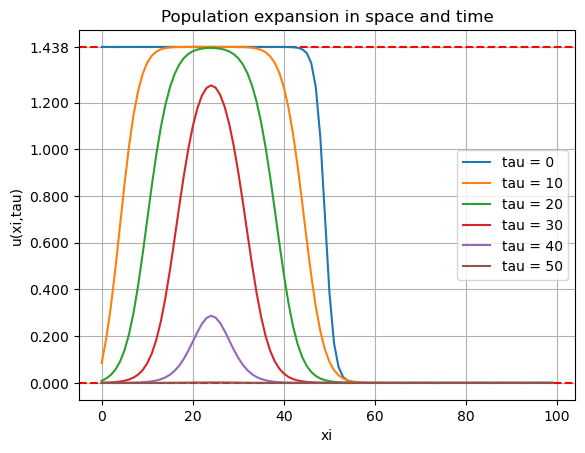

In [86]:
plt.axhline(y=1.4384, color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:], label='tau = ' + str(int(showInits[i]*dt)))
plt.legend()
plt.xlabel('xi')
plt.ylabel('u(xi,tau)')
plt.title('Population expansion in space and time')

plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4384])

plt.grid()
plt.show()

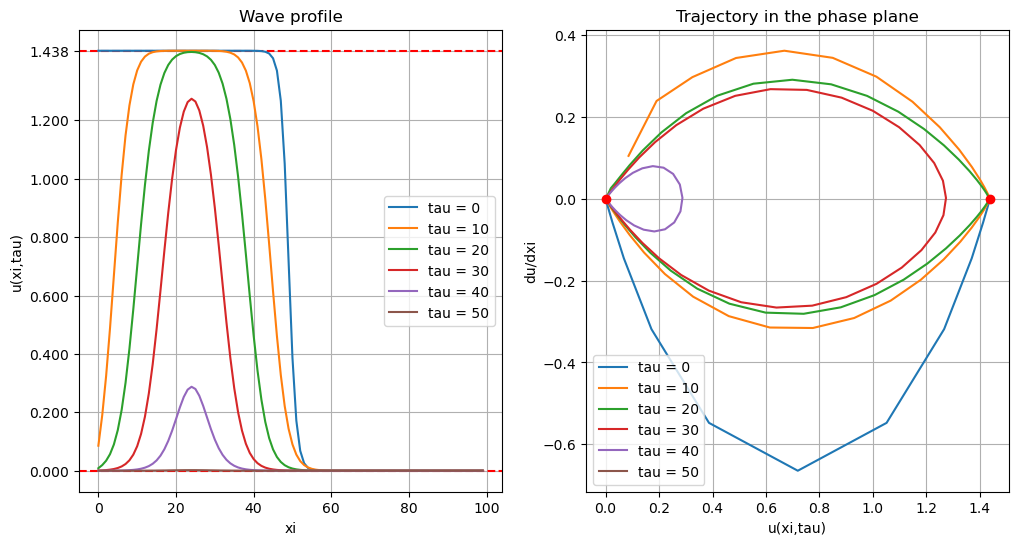

In [87]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.axhline(y=1.4384, color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:], label='tau = ' + str(int(showInits[i]*dt)))
plt.legend()
plt.xlabel('xi')
plt.ylabel('u(xi,tau)')
plt.title('Wave profile')

plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4384])
plt.grid()

plt.subplot(1, 2, 2)
# plot u vs du/dx
for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:], martixPhaseSpace[showInits[i],:], label='tau = ' + str(int(showInits[i]*dt)))
plt.legend()
plt.xlabel('u(xi,tau)')
plt.ylabel('du/dxi')
plt.title('Trajectory in the phase plane')
plt.plot(0, 0, 'ro')  
plt.plot(1.4384, 0, 'ro')  
plt.grid()

plt.show()


### Result for the approximate velocity c

The approximate velocity, c = 0.625


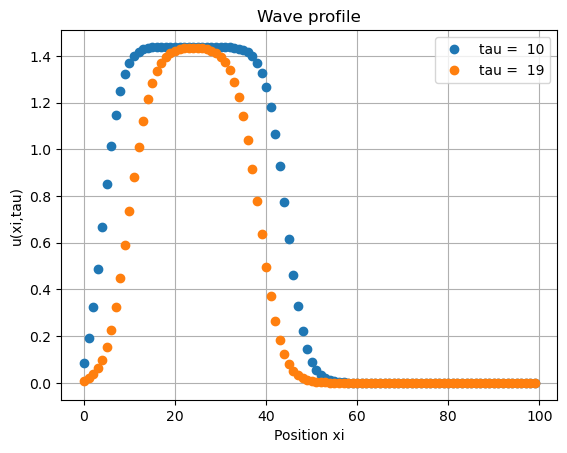

In [88]:
showInits = [500,980]

for i in range(len(showInits)):
    plt.plot(matrixSpaceTime[showInits[i],:],marker='o', label='tau =  ' + str(int(showInits[i]*dt)), linestyle='')
plt.xlabel('Position xi')
plt.ylabel('u(xi,tau)')
plt.title('Wave profile')
plt.legend()
plt.grid()

print('The approximate velocity, c = ' + str(approximateVelocity(matrixSpaceTime, 500,980, 0.8)))